# ML-MAJOR-JUNE

1. Load dataset from - https://covid.ourworldindata.org/data/owid-covid-data.csv<br>
2. Subset only those rows that have “India” in the “location” column(This subsetted
dataframe has to be used for modelling)<br>
3. Handle Missing values:<br>
a. If there are null values in continuous numerical column, replace the null values by
the mean of that column<br>
b. If there are null values in ordinal numerical column, replace the null values by the
mode of that column<br>
c. If there are null values in categorical column, replace the null values by the mode
of that column<br>
d. If more than 50%the values in a column are null, then drop that entire column<br>

4. Univariate Analysis:<br>
a. Draw histograms of 10 feature columns<br>
b. Find mean, median and mode of each column<br>
5. Bivariate Analysis:<br>
a. Draw scatter plots of target column versus 10 features<br>
b. Draw line plots of target column versus 10 features<br>

6. Convert date column to ordinal<br>
a. Code:<br>
import datetime as dt<br>
df["date"]=pd.to_datetime(df["date"])<br>
df["date"]=df["date"].map(dt.datetime.toordinal)<br>

7. Drop useless categorical columns, and convert useful categorical to numerical by
labelencoder<br>
8. Select “total_cases” column as the target variable<br>
9. Select the other columns as the features(NOTE: the “date” column has to be
compulsorily in the features)<br>
10. Perform train-test split<br>
11. Modelling:<br>
a. Linear Regression<br>
b. Random Forest Regressor<br>
12. Get accuracy<br>
13. Predict Total case for a new date<br>

#### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("owid-covid-data.csv")

In [3]:
data_set.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,12/31/2019,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,1/2/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
col = list(data_set.columns)
print(col)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy']


#### Subsetted data

In [5]:
data = data_set[(data_set['location']=='India')]

In [6]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
14867,IND,Asia,India,12/31/2019,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14868,IND,Asia,India,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14869,IND,Asia,India,1/2/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14870,IND,Asia,India,1/3/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14871,IND,Asia,India,1/4/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


#### Handling missing data

In [7]:
data.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
new_tests                          91
total_tests                        85
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_per_case                     80
positive_rate                      80
tests_units                        73
stringency_index                    2
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_olde

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 14867 to 15087
Data columns (total 36 columns):
iso_code                           221 non-null object
continent                          221 non-null object
location                           221 non-null object
date                               221 non-null object
total_cases                        221 non-null float64
new_cases                          221 non-null float64
total_deaths                       221 non-null float64
new_deaths                         221 non-null float64
total_cases_per_million            221 non-null float64
new_cases_per_million              221 non-null float64
total_deaths_per_million           221 non-null float64
new_deaths_per_million             221 non-null float64
new_tests                          130 non-null float64
total_tests                        136 non-null float64
total_tests_per_thousand           136 non-null float64
new_tests_per_thousand             130 non-null float

In [9]:
size = len(data.iloc[:,0])
size

221

In [10]:
#removing the column with more than 50% null data
data1 = data.copy()         
for c in range(len(col)):
    tot = (((data1.iloc[:,c].isnull().sum())/size)*100)
    print(tot)
    if tot>50:
        data1 = data1.drop(c,axis=1)
data1.shape

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
41.17647058823529
38.46153846153847
38.46153846153847
41.17647058823529
36.199095022624434
36.199095022624434
36.199095022624434
36.199095022624434
33.03167420814479
0.904977375565611
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


(221, 36)

In [11]:
null_col = []    #separate array of null value column index
for c in range(len(col)):
    if (data1.iloc[:,c].isnull().sum())>0:
        null_col.append(col[c])
null_col

['new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index']

#### Removing null values

In [12]:
data1[null_col[0]].fillna(int(np.round(data1[null_col[0]].mode().median())), inplace=True)


In [13]:
data1[null_col[1]].fillna(data1[null_col[1]].mode().median(), inplace=True)

In [14]:
data1[null_col[2]].fillna(data1[null_col[2]].median(), inplace=True)

In [15]:
data1[null_col[3]].fillna(data1[null_col[3]].median(), inplace=True)

In [16]:
data1[null_col[4]].fillna(data1[null_col[4]].mode()[0], inplace=True)

In [17]:
data1[null_col[5]].fillna(data1[null_col[5]].median(), inplace=True)

In [18]:
data1[null_col[6]].fillna(data1[null_col[6]].mode()[0], inplace=True)

In [19]:
data1[null_col[7]].fillna(data1[null_col[7]].median(), inplace=True)

In [20]:
data1[null_col[8]].fillna(data1[null_col[8]].mode()[0], inplace=True)

In [21]:
data1[null_col[9]].fillna(data1[null_col[9]].mode()[0], inplace=True)

In [22]:
data1.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
g

#### Univarient analysis

Histogram of 10 feature columns

1 )


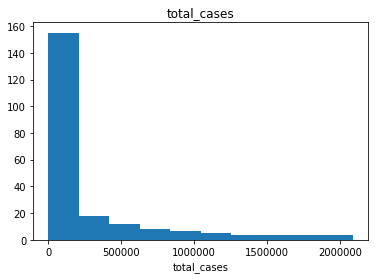

2 )


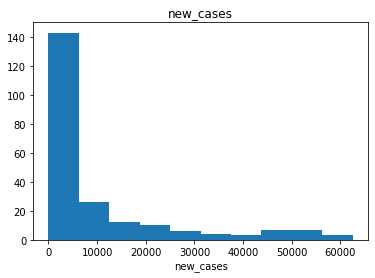

3 )


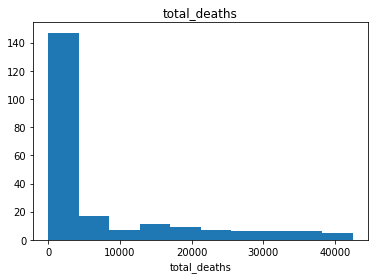

4 )


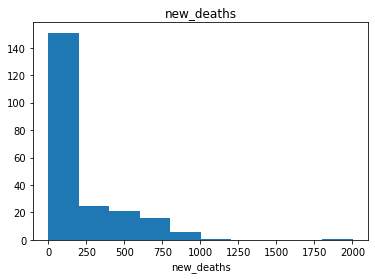

5 )


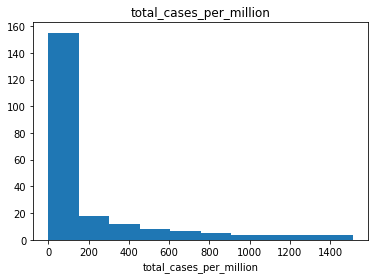

6 )


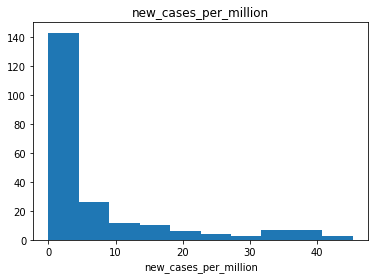

7 )


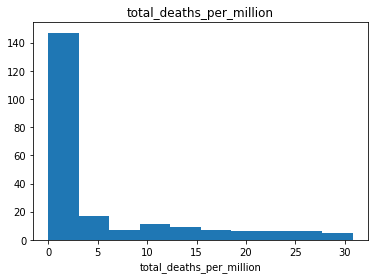

8 )


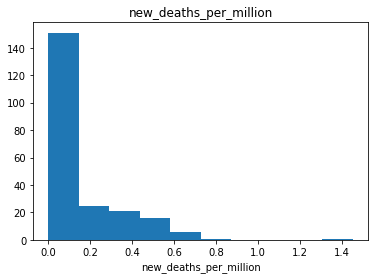

9 )


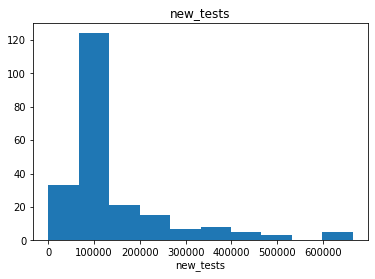

10 )


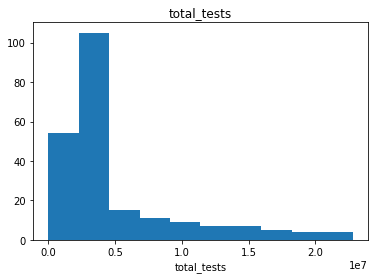

<Figure size 432x288 with 0 Axes>

In [23]:
counter = 0
for i in data1.iloc[:,4:15]:
    if counter<10:
        counter += 1
        print(counter,")")
        plt.hist(data1[i])
        plt.title(i)
        plt.xlabel(i)
        plt.show()
        plt.clf()

Mean, Meadian and Mode of each column

In [24]:
data2=data1.drop(['iso_code', 'continent', 'location', 'date','tests_units'], axis=1)   #removing the object type columns

In [25]:
count = 0
for i in data2:
    count += 1
    print(str(count)+" ) " +i+" :")
    print("Mean -> "+ str(data2[i].mean()))
    print("Median -> "+ str(data2[i].median()))
    print("Mode -> "+ str(data2[i].mode()[0]))
    print("___________________________")

1 ) total_cases :
Mean -> 274847.76018099545
Median -> 17265.0
Mode -> 0.0
___________________________
2 ) new_cases :
Mean -> 9450.72850678733
Median -> 1335.0
Mode -> 0.0
___________________________
3 ) total_deaths :
Mean -> 6931.140271493213
Median -> 543.0
Mode -> 0.0
___________________________
4 ) new_deaths :
Mean -> 192.3891402714932
Median -> 40.0
Mode -> 0.0
___________________________
5 ) total_cases_per_million :
Mean -> 199.16435746606334
Median -> 12.511
Mode -> 0.0
___________________________
6 ) new_cases_per_million :
Mean -> 6.848325791855205
Median -> 0.9670000000000001
Mode -> 0.0
___________________________
7 ) total_deaths_per_million :
Mean -> 5.0225520361990945
Median -> 0.39299999999999996
Mode -> 0.0
___________________________
8 ) new_deaths_per_million :
Mean -> 0.13940271493212672
Median -> 0.028999999999999998
Mode -> 0.0
___________________________
9 ) new_tests :
Mean -> 155339.72398190046
Median -> 128314.0
Mode -> 128314.0
___________________________


#### Bivarient data analysis

Scatter plots of target column versus 10 features

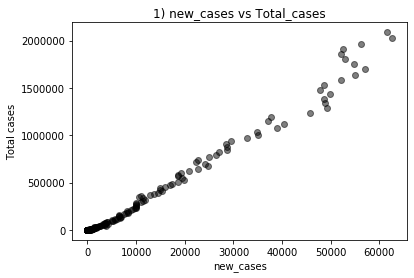

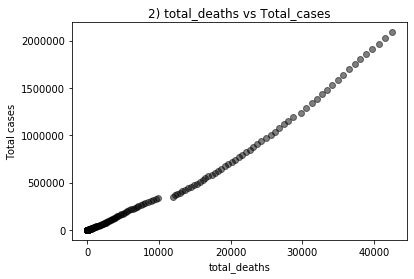

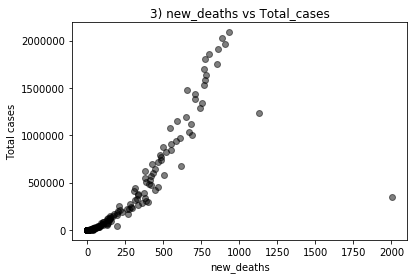

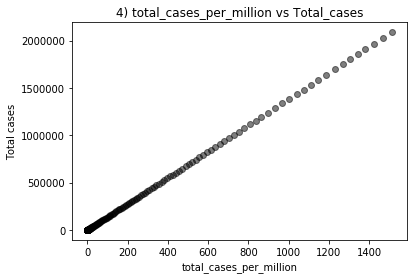

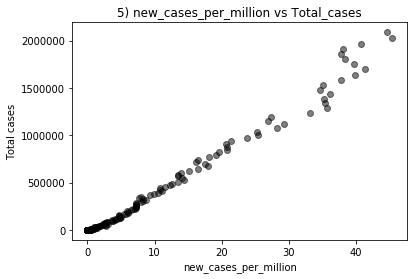

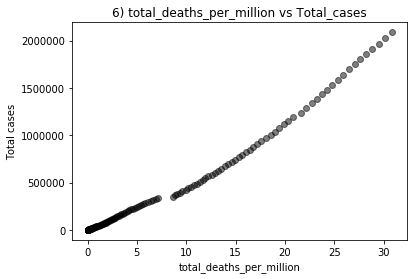

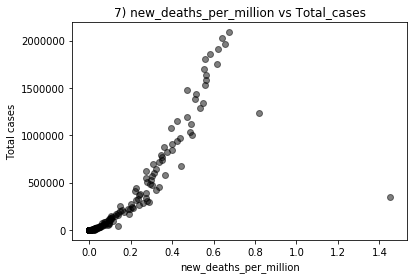

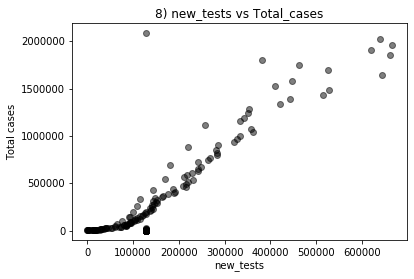

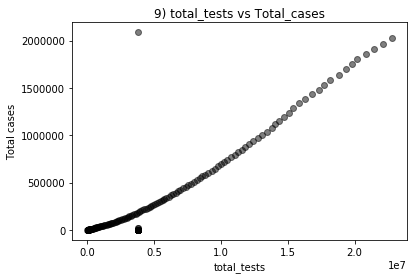

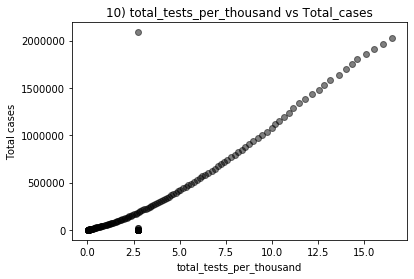

<Figure size 432x288 with 0 Axes>

In [26]:
counter = 0
for i in data1.iloc[:,5:16]:
    if counter<10:
        counter += 1
        plt.scatter(data1[i],data1['total_cases'], color='black',alpha=0.5)
        plt.title(str(counter)+") " + i + " vs Total_cases")
        plt.xlabel(i)
        plt.ylabel("Total cases")
        plt.show()
        plt.clf()

Line plots of target column versus 10 features

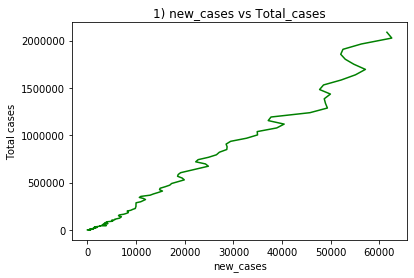

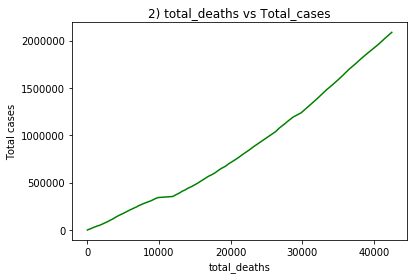

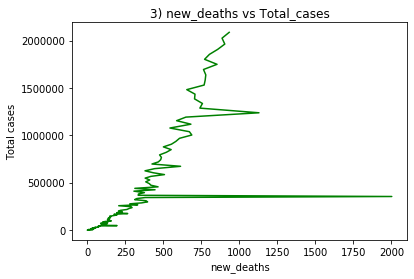

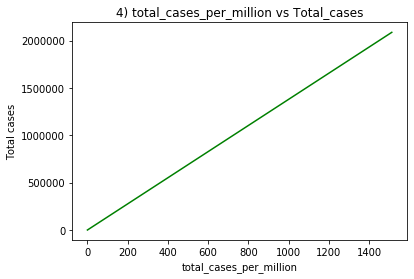

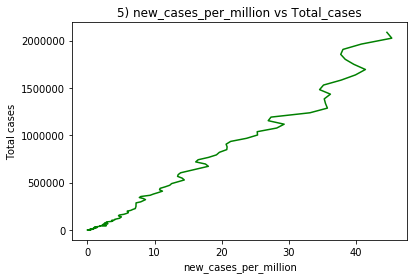

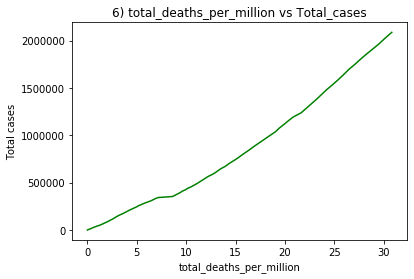

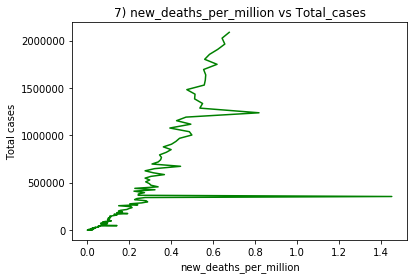

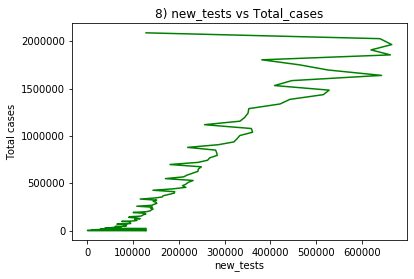

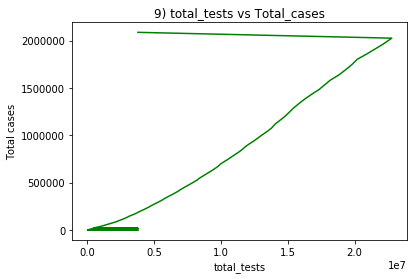

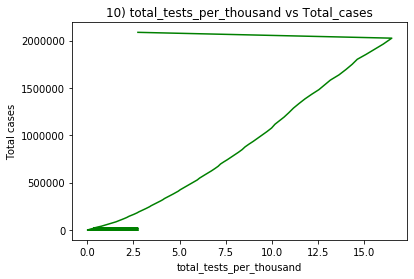

<Figure size 432x288 with 0 Axes>

In [31]:
counter = 0
for i in data1.iloc[:,5:16]:
    if counter<10:
        counter += 1
        plt.plot(data1[i],data1['total_cases'],color='green')
        plt.title(str(counter)+") " + i + " vs Total_cases")
        plt.xlabel(i)
        plt.ylabel("Total cases")
        plt.show()
        plt.clf()

#### Convert date column to ordinal

In [28]:
import datetime as dt

data1["date"]=pd.to_datetime(data1["date"])
data1["date"]=data1["date"].map(dt.datetime.toordinal)

In [29]:
data1.head(3)  #to observe the change in date column

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
14867,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14868,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
14869,IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Creating a complete separate file of the subsetted and preprocessed dataset!!

In [30]:
data1.to_csv("processed_covid_dataset.csv")   

### The futher coding is done on the above preprocessed data using the newly created file - 'processed_covid_data.csv' which is a subsetted data containing only details about India and has all its Null values handled.

### The 2nd half section of the project is coded in the file "ML-MAJOR-JUNE ( 1 ) " 